# MHKiT Wave Module 
The following example runs an application of the [MHHKiT wave module](https://mhkit-software.github.io/MHKiT/mhkit-python/api.wave.html) to 1) generate a capture length matrix, 2) calculate MAEP, and 3) plot the scatter diagrams.

Start by importing the necessary python packages and MHKiT module.

In [1]:
import numpy as np
import pandas as pd
from mhkit import wave

## Generate example data

For demonstration purposes, this example uses synthetic data generated from statistical distributions.  The data includes significant wave height, peak period, power, and omnidirectional wave flux.  In a real application, the user would provide these values.  The data is stored in pandas Series, each containing 1,000,000 points. 

In [2]:
# Set the random seed, to reproduce results
np.random.seed(1) 

Hm0 = pd.Series(np.random.rayleigh(2, 1000000)) # significant wave height values
Te = pd.Series(np.random.normal(4.5, .7, 1000000)) # peak period values
P = pd.Series(np.random.normal(200, 40, 1000000)) # power values
J = pd.Series(np.random.normal(300, 8, 1000000)) # omnidirectional wave flux values

## Capture Length Matrices

The following operations create capture length matrices, as specified by the IEC/TS 62600-100.  But first, we need to calculate capture length and define bin centers.  The mean capture length matrix is printed below.  Keep in mind that this data has been artificially generated, so it may not be representative of what a real-world scatter diagram would look like.

In [3]:
# Calculate capture length
L = wave.performance.capture_length(P, J) 

# Generate bins for Hm0 and Te
Hm0_bins = np.arange(0, Hm0.max() + .5, .5) # input is start, stop, and step size
Te_bins = np.arange(0, Te.max() + 1, 1)

# Create capture length matrices using mean, standard deviation, count, min and max statistics
LM_mean = wave.performance.capture_length_matrix(Hm0, Te, L, 'mean', Hm0_bins, Te_bins)
LM_std = wave.performance.capture_length_matrix(Hm0, Te, L, 'std', Hm0_bins, Te_bins)
LM_count = wave.performance.capture_length_matrix(Hm0, Te, L, 'count', Hm0_bins, Te_bins)
LM_min = wave.performance.capture_length_matrix(Hm0, Te, L, 'min', Hm0_bins, Te_bins)
LM_max = wave.performance.capture_length_matrix(Hm0, Te, L, 'max', Hm0_bins, Te_bins)

# Print capture length matrices using mean
print(LM_mean)

      0.0       1.0       2.0       3.0       4.0       5.0       6.0  \
0.0   NaN       NaN  0.677108  0.661884  0.667854  0.669410  0.667463   
0.5   NaN       NaN  0.659457  0.666861  0.669235  0.667149  0.667563   
1.0   NaN       NaN  0.673245  0.667466  0.666974  0.666094  0.668441   
1.5   NaN  0.462755  0.648711  0.667925  0.667478  0.666961  0.669453   
2.0   NaN  0.571597  0.668060  0.667173  0.667399  0.666887  0.669135   
2.5   NaN  0.670029  0.665025  0.668533  0.666878  0.666313  0.667502   
3.0   NaN  0.738043  0.668574  0.666087  0.666229  0.667578  0.669056   
3.5   NaN  0.677570  0.660034  0.665847  0.667352  0.667819  0.669073   
4.0   NaN       NaN  0.674354  0.666644  0.666941  0.666739  0.666447   
4.5   NaN       NaN  0.670379  0.666388  0.666439  0.667825  0.667666   
5.0   NaN  0.670436  0.660289  0.662873  0.665616  0.666663  0.665197   
5.5   NaN       NaN  0.648921  0.664406  0.666569  0.665054  0.665372   
6.0   NaN       NaN  0.707083  0.669781  0.662765  

Additional capture length matrices can be computed, for example, the frequency matrix is computed below.

In [4]:
# Create capture length matrices using frequency
LM_freq = wave.performance.capture_length_matrix(Hm0, Te, L,'frequency', Hm0_bins, Te_bins)

## Power Matrices
As specified in IEC/TS 62600-100, the power matrix is generated from the capture length matrix and wave energy flux matrix, as shown below

In [5]:
# Create wave energy flux matrix using mean
JM = wave.performance.wave_energy_flux_matrix(Hm0, Te, J, 'mean', Hm0_bins, Te_bins)

# Create power matrix using mean
PM_mean = wave.performance.power_matrix(LM_mean, JM)

# Create power matrix using standard deviation
PM_std = wave.performance.power_matrix(LM_std, JM)

The `capture_length_matrix` function can also be used as an arbitrary matrix generator. To do this, simply pass a different Series in the place of capture length (L).  For example, while not specified by the IEC standards, if the user doesn't have the omnidirectional wave flux, the average power matrix could hypothetically be generated in the following manner.

In [6]:
# Demonstration of arbitrary matrix generator
PM_mean_not_standard = wave.performance.capture_length_matrix(Hm0, Te, P, 'mean', Hm0_bins, Te_bins)

The `capture_length_matrix` function can also use a callable function as the statistic argument. For example, suppose that we wanted to generate a matrix with the variance of the capture length.  We could achieve this by passing the numpy variance function `np.var` into the `capture_length_matrix` function, as shown below.

In [7]:
# Demonstration of passing a callable function to the matrix generator
LM_variance = wave.performance.capture_length_matrix(Hm0, Te, L, np.var, Hm0_bins, Te_bins)

## MAEP
There are two ways to calculate mean annual energy production (MEAP).  One is from capture length and wave energy flux matrices, the other is from time-series data, as shown below.

In [8]:
# Calcaulte maep from timeseries
maep_timeseries = wave.performance.mean_annual_energy_production_timeseries(L, J)
print("MAEP from timeseries = ", maep_timeseries)

# Calcaulte maep from matrix
maep_matrix = wave.performance.mean_annual_energy_production_matrix(LM_mean, JM, LM_freq)
print("MAEP from matrices = ", maep_matrix)

MAEP from timeseries =  1753073.5377000887
MAEP from matrices =  1754328.6997311334


## Graphics
The graphics function `plot_matrix` can be used to visualize results.  It is important to note that the plotting function assumes the step size between bins to be linear.

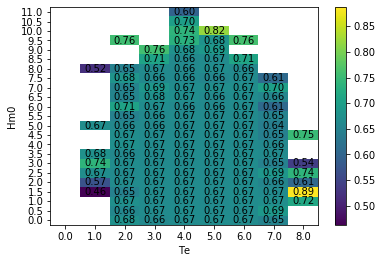

In [9]:
# Plot the capture length mean matrix
ax = wave.graphics.plot_matrix(LM_mean) 

The plotting function only requires the matrix as input, but the function can also take several other arguments.
The list of optional arguments are: `xlabel, ylabel, zlabel, show_values, and ax`. The following uses these optional arguments.  The matplotlib package is imported to define an axis with a larger figure size.

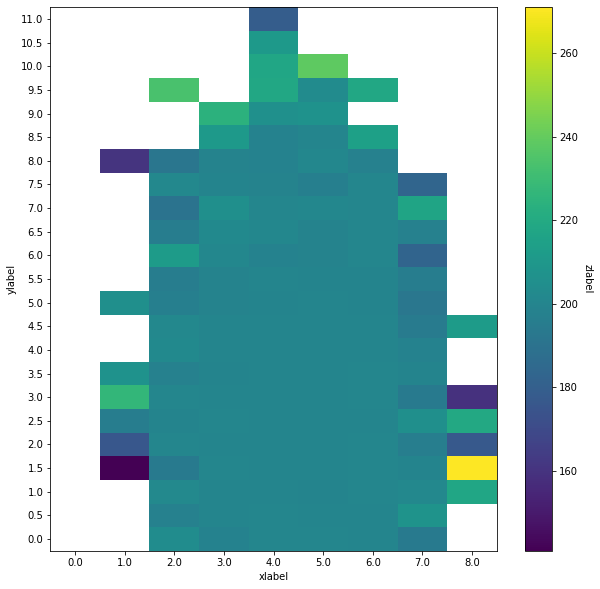

In [10]:
# Customize the matrix plot
import matplotlib.pylab as plt
plt.figure(figsize=(10,10))
ax = plt.gca()
wave.graphics.plot_matrix(PM_mean, xlabel='xlabel', ylabel='ylabel', zlabel='zlabel', show_values=False, ax=ax)